# Colors

In [1]:
import requests
from bs4 import BeautifulSoup
import re

colors_page = requests.get("https://hockeyrooms.ca/blogs/news/nhl-team-colors-cheat-sheet")
colors_soup = BeautifulSoup(
    colors_page.text, "html.parser"
)

colors_list = colors_soup.find('h2', string="NHL Team RGB, HEX, and CMYK Color Values:").find_next('ol').find_all('li', recursive=False)
parsed_colors = [
    (li.find('strong').text, [re.match("HEX: (.*)", t.text).group(1) for t in li.find_all('li', string=re.compile("HEX: .*"))])
    for li in colors_list
]
parsed_colors

[('Anaheim Ducks:', ['#00004E', '#FFB81C']),
 ('Arizona Coyotes:', ['#A2AAAD', '#E22620']),
 ('Boston Bruins:', ['#FFC72C', '#000000']),
 ('Buffalo Sabres:', ['#0038A8', '#C8102E']),
 ('Calgary Flames:', ['#CE1126', '#F1B42F']),
 ('Carolina Hurricanes:', ['#E21837', '#003164']),
 ('Chicago Blackhawks:', ['#CE1126', '#FFC72C']),
 ('Colorado Avalanche:', ['#6F263D', '#236192']),
 ('Columbus Blue Jackets:', ['#0038A8', '#B4975A']),
 ('Dallas Stars:', ['#002D62', '#0071CE']),
 ('Detroit Red Wings:', ['#C8102E', '#FFFFFF']),
 ('Edmonton Oilers:', ['#0038A8', '#FFBF00']),
 ('Florida Panthers:', ['#C8102E', '#041E42']),
 ('Los Angeles Kings:', ['#000000', '#FFC72C']),
 ('Minnesota Wild:', ['#01365E', '#9B6A51']),
 ('Montreal Canadiens:', ['#CE1126', '#00205B']),
 ('Nashville Predators:', ['#00285E', '#E31837']),
 ('New Jersey Devils:', ['#CE1126', '#000000']),
 ('New York Islanders:', ['#002868', '#FFFFFF']),
 ('New York Rangers:', ['#CE1126', '#0038A8']),
 ('Ottawa Senators:', ['#C8102E', '#

## Loading Data

In [1]:
import json
plays = []
roster = []
shifts = []
game = {}
with open('./data/play_by_play-2024020861.json', 'r') as file:
    pbpjson = json.load(file)
    plays = pbpjson['plays']
    roster = pbpjson['rosterSpots']
    game = pbpjson
with open('./data/shiftcharts-2024020861.json', 'r') as file:
    shiftsjson = json.load(file)
    shifts = shiftsjson['data']
homeId = game['homeTeam']['id']
awayId = game['awayTeam']['id']
homeRoster = [r for r in roster if r['teamId'] == homeId]
awayRoster = [r for r in roster if r['teamId'] == awayId]
homeMap = {r['playerId']: r for r in roster if r['teamId'] == homeId}
awayMap = {r['playerId']: r for r in roster if r['teamId'] == awayId}
allMap = {r['playerId']: r for r in roster}


### Player Data

In [2]:
import polars as pl
pl.DataFrame(roster)

teamId,playerId,firstName,lastName,sweaterNumber,positionCode,headshot
i64,i64,struct[3],struct[3],i64,str,str
26,8471685,"{""Anze"",""Anže"",""Anže""}","{""Kopitar"",null,null}",11,"""C""","""https://assets.nhle.com/mugs/n…"
26,8473453,"{""Trevor"",null,null}","{""Lewis"",null,null}",61,"""C""","""https://assets.nhle.com/mugs/n…"
26,8474563,"{""Drew"",null,null}","{""Doughty"",null,null}",8,"""D""","""https://assets.nhle.com/mugs/n…"
8,8475233,"{""David"",null,null}","{""Savard"",null,null}",58,"""D""","""https://assets.nhle.com/mugs/n…"
26,8475311,"{""Darcy"",null,null}","{""Kuemper"",null,null}",35,"""G""","""https://assets.nhle.com/mugs/n…"
…,…,…,…,…,…,…
8,8482733,"{""Logan"",null,null}","{""Mailloux"",null,null}",24,"""D""","""https://assets.nhle.com/mugs/n…"
8,8482964,"{""Arber"",null,null}","{""Xhekaj"",null,null}",72,"""D""","""https://assets.nhle.com/mugs/n…"
8,8483424,"{""Owen"",null,null}","{""Beck"",null,null}",62,"""C""","""https://assets.nhle.com/mugs/n…"


### Plays

In [3]:
import copy
details = [
    p.get('details', {}) for p in plays
]
print_plays = copy.deepcopy(plays)
for p in print_plays:
    if 'details' in p:
        p.pop('details')
plays_df = pl.DataFrame([
    {**d, **p} for d, p in zip(details, print_plays)
])
print(plays_df.columns)
plays_df

['eventId', 'periodDescriptor', 'timeInPeriod', 'timeRemaining', 'situationCode', 'homeTeamDefendingSide', 'typeCode', 'typeDescKey', 'sortOrder', 'eventOwnerTeamId', 'losingPlayerId', 'winningPlayerId', 'xCoord', 'yCoord', 'zoneCode', 'shotType', 'shootingPlayerId', 'goalieInNetId', 'awaySOG', 'homeSOG', 'reason', 'playerId', 'blockingPlayerId', 'scoringPlayerId', 'scoringPlayerTotal', 'assist1PlayerId', 'assist1PlayerTotal', 'awayScore', 'homeScore', 'highlightClipSharingUrl', 'highlightClipSharingUrlFr', 'highlightClip', 'highlightClipFr', 'discreteClip', 'discreteClipFr', 'pptReplayUrl', 'hittingPlayerId', 'hitteePlayerId', 'secondaryReason', 'descKey', 'duration', 'committedByPlayerId', 'drawnByPlayerId', 'servedByPlayerId']


eventId,periodDescriptor,timeInPeriod,timeRemaining,situationCode,homeTeamDefendingSide,typeCode,typeDescKey,sortOrder,eventOwnerTeamId,losingPlayerId,winningPlayerId,xCoord,yCoord,zoneCode,shotType,shootingPlayerId,goalieInNetId,awaySOG,homeSOG,reason,playerId,blockingPlayerId,scoringPlayerId,scoringPlayerTotal,assist1PlayerId,assist1PlayerTotal,awayScore,homeScore,highlightClipSharingUrl,highlightClipSharingUrlFr,highlightClip,highlightClipFr,discreteClip,discreteClipFr,pptReplayUrl,hittingPlayerId,hitteePlayerId,secondaryReason,descKey,duration,committedByPlayerId,drawnByPlayerId,servedByPlayerId
i64,struct[3],str,str,str,str,i64,str,i64,i64,i64,i64,i64,i64,str,str,i64,i64,i64,i64,str,i64,i64,i64,i64,i64,i64,i64,i64,str,str,i64,i64,i64,i64,str,i64,i64,str,str,i64,i64,i64,i64
52,"{1,""REG"",3}","""00:00""","""20:00""","""1551""","""right""",520,"""period-start""",8,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
51,"{1,""REG"",3}","""00:00""","""20:00""","""1551""","""right""",502,"""faceoff""",11,26,8481618,8471685,0,0,"""N""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
103,"{1,""REG"",3}","""00:07""","""19:53""","""1551""","""right""",506,"""shot-on-goal""",12,26,null,null,-27,-36,"""O""","""wrist""",8476441,8482487,0,1,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
104,"{1,""REG"",3}","""00:21""","""19:39""","""1551""","""right""",506,"""shot-on-goal""",13,26,null,null,53,-39,"""D""","""wrist""",8476441,8482487,0,2,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
8,"{1,""REG"",3}","""00:25""","""19:35""","""1551""","""right""",516,"""stoppage""",14,null,null,null,null,null,null,null,null,null,null,null,"""goalie-stopped-after-sog""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
1105,"{3,""REG"",3}","""18:31""","""01:29""","""1551""","""right""",507,"""missed-shot""",764,8,null,null,32,33,"""O""","""wrist""",8475233,8475311,null,null,"""wide-right""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
1106,"{3,""REG"",3}","""18:41""","""01:19""","""1551""","""right""",506,"""shot-on-goal""",765,26,null,null,-64,23,"""O""","""wrist""",8482730,8482487,18,31,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
1107,"{3,""REG"",3}","""18:44""","""01:16""","""1551""","""right""",508,"""blocked-shot""",766,26,null,null,-62,-6,"""D""",null,8476441,null,null,null,"""blocked""",null,8478133,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


### Shifts

In [7]:
for item in shifts:
    if not item['eventDetails']:
        item['eventDetails'] = ''
    if not item['eventDescription']:
        item['eventDescription'] = ''
pl.DataFrame(shifts)

id,detailCode,duration,endTime,eventDescription,eventDetails,eventNumber,firstName,gameId,hexValue,lastName,period,playerId,shiftNumber,startTime,teamAbbrev,teamId,teamName,typeCode
i64,i64,str,str,str,str,i64,str,i64,str,str,i64,i64,i64,str,str,i64,str,i64
15040215,0,"""00:29""","""00:29""","""""","""""",6,"""Anze""",2024020861,"""#111111""","""Kopitar""",1,8471685,1,"""00:00""","""LAK""",26,"""Los Angeles Kings""",517
15040216,0,"""01:07""","""04:12""","""""","""""",149,"""Anze""",2024020861,"""#111111""","""Kopitar""",1,8471685,2,"""03:05""","""LAK""",26,"""Los Angeles Kings""",517
15040361,0,"""01:10""","""09:09""","""""","""""",251,"""Anze""",2024020861,"""#111111""","""Kopitar""",1,8471685,3,"""07:59""","""LAK""",26,"""Los Angeles Kings""",517
15040362,0,"""00:32""","""12:00""","""""","""""",302,"""Anze""",2024020861,"""#111111""","""Kopitar""",1,8471685,4,"""11:28""","""LAK""",26,"""Los Angeles Kings""",517
15040536,0,"""01:19""","""15:05""","""""","""""",327,"""Anze""",2024020861,"""#111111""","""Kopitar""",1,8471685,5,"""13:46""","""LAK""",26,"""Los Angeles Kings""",517
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
15041219,0,"""00:32""","""07:30""","""""","""""",898,"""Juraj""",2024020861,"""#A6192E""","""Slafkovsky""",3,8483515,16,"""06:58""","""MTL""",8,"""MontrÃ©al Canadiens""",517
15041220,0,"""00:28""","""09:41""","""""","""""",923,"""Juraj""",2024020861,"""#A6192E""","""Slafkovsky""",3,8483515,17,"""09:13""","""MTL""",8,"""MontrÃ©al Canadiens""",517
15041292,0,"""01:11""","""12:36""","""""","""""",963,"""Juraj""",2024020861,"""#A6192E""","""Slafkovsky""",3,8483515,18,"""11:25""","""MTL""",8,"""MontrÃ©al Canadiens""",517


In [8]:
import datetime 
OT_DURATIONS = {
    2: 5 * 60,
    3: 20 * 60,
    19: 10 * 60,
    20: 20 * 60,
}

REG_DURATION = 20 * 60

def mmss_time(timestr):
    parts = [ int(t) for t in timestr.split(':')]
    return datetime.time(hour=0, minute=parts[0], second=parts[1])

def mmss_sec(timestr):
    time = mmss_time(timestr)
    return time.second + time.minute * 60 

def get_time_s(data, time_in_period, game_type):
    pd = data.get('periodDescriptor')
    if not pd:
        raise Exception("no periodDescriptor found")
    if pd['number'] <= pd['maxRegulationPeriods'] + 1:
        return (pd['number'] - 1) * REG_DURATION + mmss_sec(time_in_period)
    else:
        return pd['maxRegulationPeriods'] * REG_DURATION + (pd['number'] - 1) * OT_DURATIONS[game_type] + mmss_sec(time_in_period)

# idx = 100
# get_time_s(plays[idx], plays[idx]['timeInPeriod'], game['gameType'])

In [9]:
def generate_pplays(players, plays):
    player_plays = { p['playerId'] : [] for p in players }
    for play in plays:
        if not play.get('details'):
            continue
        detail_keys = set(play['details'].keys())
        player_detail_keys = list(d for d in detail_keys if str(d).lower().find('playerid') + 1)
        if not len(player_detail_keys):
            # print('no player involved')
            continue
        pids = [play['details'][player_idkey] for player_idkey in player_detail_keys]
        for player_idkey in player_detail_keys:
            pid = play['details'][player_idkey]
            player_plays[pid].append({
                'playerId': pid,
                'role': player_idkey.lower().replace('playerid', ''),
                'eventId': play['eventId'],
                'event': play['typeDescKey'],
                'links': pids,
                'play': play,
                't':get_time_s(play, play['timeInPeriod'], game['gameType']),
                'x': play['details']['xCoord'],
                'y': play['details']['yCoord'],
            })
    return player_plays

def generate_shifts(players, shifts):
    player_shifts = { p['playerId'] : [] for p in players }
    for shift in shifts:
        pd = {
            'periodDescriptor' : { 'number': shift['period'], 'maxRegulationPeriods': shift['period'], }
        }
        start, end = shift['startTime'], shift['endTime']
        t0, t1 = get_time_s(pd, start, game['gameType']), get_time_s(pd, end, game['gameType'])
        player_shifts.get(shift['playerId']).append({
            'playerId': shift['playerId'],
            't0': t0,
            't1': t1,
            'dt': t1 - t0,
            'eventNumber': shift['eventNumber'],
            'shift': shift
        })
    return player_shifts

def player_str(bio): 
    return f"{bio['firstName']['default']} {bio['lastName']['default']}"

playdict = generate_pplays(players=roster, plays=plays)
shiftdict = generate_shifts(players=roster, shifts=shifts)
lookup = { p['playerId'] : p for p in roster }
lookup_name = { player_str(p) : p for p in roster }

In [10]:
def bsearch_shifts(shiftlist, t):
    def in_shift(s, t):
        return s['t0'] <= t and t <= s['t1']
    s, e = 0, len(shiftlist) - 1
    while s < e:
        m = (s + e) // 2
        if in_shift(shiftlist[m], t):
            return shiftlist[m]
        if shiftlist[m]['t1'] < t:
            s = m + 1
        elif shiftlist[m]['t0'] > t:
            e = m
        # print(shiftlist[m]['t0'], t,shiftlist[m]['t1'],)
    return None

# print(bsearch_shifts(shiftdict[lookup_name.get('Anze Kopitar')['playerId']], 340))
# print(bsearch_shifts(shiftdict[lookup_name.get('Anze Kopitar')['playerId']], 250))

In [11]:
set([p['typeDescKey'] for p in plays])

{'blocked-shot',
 'delayed-penalty',
 'faceoff',
 'game-end',
 'giveaway',
 'goal',
 'hit',
 'missed-shot',
 'penalty',
 'period-end',
 'period-start',
 'shot-on-goal',
 'stoppage',
 'takeaway'}

## Wishlist

- [ ] skater - for each shot attempt, tally iCF/iFF
- [ ] skater - for each shot attempt, tally faceoff win
- [ ] skater - for each shot attempt, tally takeaway
- [ ] skater - for each shot attempt, tally giveaway
- [ ] skater - for each shot attempt, find who is on ice. tally CF/CA/FF/FA etc. binary search
- [ ] team - for each shot attempt, tally team shot stats.
- [ ]

### Basic Stats Compilation

In [16]:
CF_EVENTS = set([
    'blocked-shot',
    'missed-shot',
    'shot-on-goal',
    'goal',
])
FF_EVENTS = set([
    'missed-shot',
    'shot-on-goal',
    'goal',
])

player_stats = { p['playerId'] : { } for p in roster }
player_raw_stats = { p['playerId'] : { } for p in roster }

for pid, pplays in playdict.items():
    # print(pid, player_str(lookup.get(pid)))
    stats = {}
    # pshifts = shiftdict.get(pid)
    icfshots = [p for p in pplays if p['event'] in CF_EVENTS and p['role'] == 'shooting']
    stats['icf'] = [p['eventId'] for p in icfshots]
    stats['iff'] = [p['eventId'] for p in icfshots if p['event'] in FF_EVENTS]
    stats['takeaways'] = [p['eventId'] for p in pplays if p['event'] == 'takeaway']
    stats['giveaways'] = [p['eventId'] for p in pplays if p['event'] == 'giveaway']
    stats['blocked'] = [p['eventId'] for p in pplays if p['event'] == 'blocked-shot' and p['role'] == 'blocking']
    stats['penalty'] = [p['eventId'] for p in pplays if p['event'] == 'penalty']
    stats['faceoff_win'] = [p['eventId'] for p in pplays if p['event'] == 'faceoff' and p['role'] == 'winning']
    stats['faceoff_lose'] = [p['eventId'] for p in pplays if p['event'] == 'faceoff' and p['role'] == 'losing']
    player_raw_stats[pid] = stats
    count_stats = {
        p: len(evs) for p, evs in stats.items()
    }
    count_stats['playerId'] = pid
    count_stats['name'] = player_str(lookup.get(pid))
    player_stats[pid] = count_stats

for play in plays:
    # print(play)
    time = get_time_s(play, play['timeInPeriod'], game['gameType'])
    is_corsi = play['typeDescKey'] in CF_EVENTS
    is_fenwick = play['typeDescKey'] in FF_EVENTS
    if not is_corsi:
        continue
    shooterId = play['details'].get(f"{'scoring' if play['typeDescKey'] == 'goal' else 'shooting'}PlayerId")
    shooter = lookup.get(shooterId)
    cf_team = shooter['teamId']
    ca_team = awayId if cf_team == homeId else homeId
    cf_roster = homeRoster if cf_team == homeId else awayRoster
    ca_roster = awayRoster if cf_team == homeId else homeRoster
    cf_team_members = [x for x in [
        bsearch_shifts(shiftdict[r['playerId']], time)
        for r in cf_roster
    ] if x]
    # print(time, play['typeDescKey'], [player_str(lookup.get(c['playerId'])) for c in cf_team_members])
    for c in cf_team_members:
        cid = c['playerId']
        player_stats[cid]['cf'] = player_stats[cid].get('cf', 0) + 1
        if is_fenwick:
            player_stats[cid]['ff'] = player_stats[cid].get('ff', 0) + 1
    ca_team_members = [x for x in [
        bsearch_shifts(shiftdict[r['playerId']], time)
        for r in ca_roster
    ] if x]
    # print(time, play['typeDescKey'], [player_str(lookup.get(c['playerId'])) for c in ca_team_members])
    for c in ca_team_members:
        cid = c['playerId']
        player_stats[cid]['ca'] = player_stats[cid].get('ca', 0) + 1
        if is_fenwick:
            player_stats[cid]['fa'] = player_stats[cid].get('fa', 0) + 1
pl.Config().set_tbl_rows(40)
pl.DataFrame(list(i for i in player_stats.values() if i.get('cf') or i.get('ca')))

icf,iff,takeaways,giveaways,blocked,penalty,faceoff_win,faceoff_lose,playerId,name,cf,ff,ca,fa
i64,i64,i64,i64,i64,i64,i64,i64,i64,str,i64,i64,i64,i64
2,1,1,1,2,1,11,9,8471685,"""Anze Kopitar""",18,16,13,9
2,1,0,0,1,0,4,4,8473453,"""Trevor Lewis""",7,3,11,8
4,4,0,2,1,0,0,0,8474563,"""Drew Doughty""",27,23,26,18
4,3,2,0,2,0,0,0,8475233,"""David Savard""",16,9,33,24
0,0,0,0,0,1,0,0,8475311,"""Darcy Kuemper""",51,40,29,21
1,0,0,1,0,0,0,0,8475848,"""Brendan Gallagher""",6,4,17,13
10,6,0,1,0,0,0,0,8476441,"""Joel Edmundson""",29,21,16,14
4,3,0,1,0,0,0,0,8476469,"""Joel Armia""",8,5,18,12
1,1,0,0,2,0,4,12,8476479,"""Phillip Danault""",27,23,13,11


### Rebounds

In [17]:
def extract_plays(fn):
    def handle_fn(plays, within):
        time_s = [
            get_time_s(p, p['timeInPeriod'], game['gameType']) for p in plays
        ]
        last = {
            game['homeTeam']['id']: {
                'lidx': 0,
                'plist': [],
            },
            game['awayTeam']['id']: {
                'lidx': 0,
                'plist': [],
            },
        }
        for i in range(1, len(plays)):
            fn(plays, within, time_s, i, last)
        return {
            game['homeTeam']['id']: last[game['homeTeam']['id']]['plist'],
            game['awayTeam']['id']: last[game['awayTeam']['id']]['plist']
        }
    return handle_fn

@extract_plays
def get_rebounds(plays, within, time_s, i, last):
    play = plays[i]
    if play['typeDescKey'] not in CF_EVENTS:
        return
    key = 'scoringPlayerId' if play['typeDescKey'] == 'goal' else 'shootingPlayerId'
    player = lookup.get(play.get('details')[key])
    team_id = player['teamId']
    t = time_s[i]
    if t - time_s[last[team_id]['lidx']] < 3:
        last[team_id]['plist'].append(play)
    last[team_id]['lidx'] = i

@extract_plays
def get_rushes(plays, within, time_s, i, last):
    play = plays[i]
    

    if play['typeDescKey'] not in CF_EVENTS:
        return
    key = 'scoringPlayerId' if play['typeDescKey'] == 'goal' else 'shootingPlayerId'
    player = lookup.get(play.get('details')[key])
    team_id = player['teamId']
    t = time_s[i]
    if t - time_s[last[team_id]['lidx']] < 3:
        last[team_id]['plist'].append(play)
    last[team_id]['lidx'] = i

plays = sorted(plays, key=lambda x:x['sortOrder'])
rebounds = get_rebounds(plays, 3)


### Scoring Chances

In [18]:
import matplotlib.pyplot as plt
import drawsvg as draw
from IPython.display import display as ICD

26

8

event,time,period,homeTeamDefendingSide,timestr,corsi,shooter,jersey,eventOwnerTeamId,losingPlayerId,winningPlayerId,xCoord,yCoord,zoneCode,shotType,shootingPlayerId,goalieInNetId,awaySOG,homeSOG,reason,…,scoringPlayerTotal,assist1PlayerId,assist1PlayerTotal,awayScore,homeScore,highlightClipSharingUrl,highlightClipSharingUrlFr,highlightClip,highlightClipFr,discreteClip,discreteClipFr,hittingPlayerId,hitteePlayerId,secondaryReason,typeCode,descKey,duration,committedByPlayerId,drawnByPlayerId,servedByPlayerId
str,i64,i64,str,str,bool,struct[1],i64,i64,i64,i64,i64,i64,str,str,i64,i64,i64,i64,str,…,i64,i64,i64,i64,i64,str,str,i64,i64,i64,i64,i64,i64,str,str,str,i64,i64,i64,i64
"""blocked-shot""",1447,2,"""left""","""04:07 P2""",true,"{""Lewis""}",61,26,null,null,85,16,"""D""",null,8473453,null,null,null,"""blocked""",…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""blocked-shot""",1554,2,"""left""","""05:54 P2""",true,"{""Xhekaj""}",72,8,null,null,-49,-24,"""D""",null,8482964,null,null,null,"""blocked""",…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""blocked-shot""",1863,2,"""left""","""11:03 P2""",true,"{""Kempe""}",9,26,null,null,65,9,"""D""",null,8477960,null,null,null,"""blocked""",…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""blocked-shot""",1905,2,"""left""","""11:45 P2""",true,"{""Moore""}",12,26,null,null,81,-5,"""D""",null,8479675,null,null,null,"""blocked""",…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""shot-on-goal""",2067,2,"""left""","""14:27 P2""",true,"{""Moore""}",12,26,null,null,-56,-41,"""D""","""backhand""",8479675,8482487,12,21,null,…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""blocked-shot""",2337,2,"""left""","""18:57 P2""",true,"{""Spence""}",21,26,null,null,80,-10,"""D""",null,8481606,null,null,null,"""teammate-blocked""",…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
"""blocked-shot""",2399,2,"""left""","""19:59 P2""",true,"{""Edmundson""}",6,26,null,null,60,20,"""D""",null,8476441,null,null,null,"""blocked""",…,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null


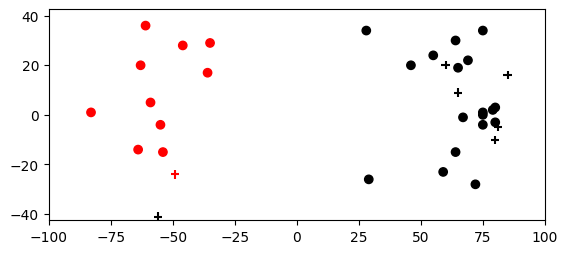

In [33]:
all_details = [{
    'event': p['typeDescKey'], 
    'time': get_time_s(p, p['timeInPeriod'], game['gameType']), 
    'period': p['periodDescriptor']['number'], 
    'homeTeamDefendingSide': p['homeTeamDefendingSide'], 
    'timestr': f"{p['timeInPeriod']} P{p['periodDescriptor']['number']}", 
    'corsi': p['typeDescKey'] in CF_EVENTS, 
    'shooter': allMap.get(p.get('details', {}).get('shootingPlayerId', ''), {}).get('lastName'), 
    'jersey': allMap.get(p.get('details', {}).get('shootingPlayerId', ''), {}).get('sweaterNumber'), 
    **p.get('details', {})
} for p in plays]
dzone = pl.DataFrame(all_details).filter(pl.col('zoneCode') == 'D').filter(pl.col('corsi') == True).filter(pl.col('period')==2)
nzone = pl.DataFrame(all_details).filter(pl.col('zoneCode') == 'N').filter(pl.col('corsi') == True).filter(pl.col('period')==2)
ozone = pl.DataFrame(all_details).filter(pl.col('zoneCode') == 'O').filter(pl.col('corsi') == True).filter(pl.col('period')==2)
non_shots = pl.DataFrame(all_details).filter(pl.col('corsi') == False).filter(pl.col('time')< 30).filter(pl.col('xCoord').is_not_null())
display(homeId, awayId)
pl.Config().set_tbl_rows(40)
pl.Config().set_tbl_cols(40)
ICD(dzone)
zones = {
    'D': {
        'df': dzone,
        'm': '+',
        # 'adjust_x': lambda x, team: x/ 3 - (-66 if team==homeId else 66)
        'adjust_x': lambda x, team: x
    },
    'N': {
        'df': nzone,
        'm': '^',
        'adjust_x': lambda x, team: x
        # 'adjust_x': lambda x, team: x/ 3
    },
    'O': {
        'df': ozone,
        'm': 'o',
        'adjust_x': lambda x, team: x
        # 'adjust_x': lambda x, team: x/ 3 + (-66 if team==homeId else 66)
    },
    # 'n': {
    #     'df': non_shots,
    #     'm': 'd',
    #     'adjust_x': lambda x, team:x #x/ 3 + (-66 if team==homeId else 66)
    # },
}

for zone, zonedata in zones.items():
    zoned = zonedata['df'].to_dicts()
    zonedata['x'] = [zonedata['adjust_x'](p.get('xCoord'), p.get('eventOwnerTeamId')) for p in zoned if p.get('xCoord') is not None]
    zonedata['y'] = [p.get('yCoord') for p in zoned if p.get('xCoord') is not None]
    zonedata['c'] = ['black' if p.get('eventOwnerTeamId') == homeId else 'red' for p in zoned if p.get('xCoord') is not None]
    plt.scatter(zonedata['x'], zonedata['y'], c=zonedata['c'], marker=zonedata['m'])
    for i, p in enumerate(zoned):
        if not p['xCoord']:
            continue
        # plt.annotate(f"{str(p['timestr'])} [{p['jersey']}] - {p['event']}", (zonedata['x'][i], zonedata['y'][i]))

plt.xlim((-100, 100))
plt.ylim((-42.5, 42.5))
plt.gca().set_aspect('equal')
plt.savefig("./diagrams/period-2.svg")
# plt.show()

### Drawing rink

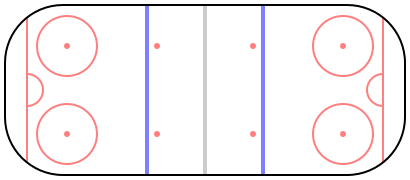

In [ ]:
RINK = ((-100, 100), (-42.5, 42.5))
PADDING = 5
d = draw.Drawing(
    RINK[0][1] - RINK[0][0] + PADDING, 
    RINK[1][1] - RINK[1][0] + PADDING, 
    origin='center')
clip = draw.ClipPath()
border = draw.Group(opacity=1.0)

# rink border
str_lines = [
    [-100+29, -42.5, 100-29, -42.5, 'black' ],
    [-100, -42.5+29, -100, 42.5-29, 'black' ],
    [100, -42.5+29, 100, 42.5-29, 'black' ],
    [-100+29, 42.5, 100-29, 42.5, 'black' ],
]
items = [clip, border]
for l in str_lines:
    for c in items:
        c.append(draw.Line(l[0], l[1], l[2], l[3],
                    stroke_width=1,
                    stroke=l[4]))
# rink border
arc_lines = [
    [-100+29, -42.5+29, 29, 90, 180],
    [-100+29, 42.5-29, 29, 180, 270],
    [100-29, 42.5-29, 29, 270, 0],
    [100-29, -42.5+29, 29, 0, 90],
]
for l in arc_lines:
    for c in items:
        c.append(draw.ArcLine(l[0], l[1], l[2], l[3], l[4],
                    fill='none',
                    stroke_width=1,
                    stroke='black'))
clip.append(draw.Rectangle( -100+29, -42.5, 200-29*2, 85, fill='none'))

# red and blue lines
inn_lines = [
    [-100+11, -42.5, -100+11, 42.5, 'red', 1 ],
    [100-11, -42.5, 100-11, 42.5, 'red', 1 ],
    [-100+11+60, -42.5, -100+11+60, 42.5, 'blue', 2 ],
    [100-11-60, -42.5, 100-11-60, 42.5, 'blue', 2 ],
]
g = draw.Group(opacity=0.5, clip_path=clip)
for l in inn_lines:
    g.append(draw.Line(l[0], l[1], l[2], l[3],
                fill='none',
                stroke_width=l[5],
                stroke=l[4]))
innarc_lines = [
    # creases
    [-100+11, 0, 8, 270, 90, 'red'],
    [100-11, 0, 8, 90, 270, 'red'],
    # circles
    [-100+31, 22, 15, 0, 360, 'red'],
    [100-31, 22, 15, 0, 360, 'red'],
    [-100+31, -22, 15, 0, 360, 'red'],
    [100-31, -22, 15, 0, 360, 'red'],
    # faceoff dots in circles
    [-100+31, 22, 1, 0, 360, 'red'],
    [100-31, 22, 1, 0, 360, 'red'],
    [-100+31, -22, 1, 0, 360, 'red'],
    [100-31, -22, 1, 0, 360, 'red'],
    # faceoff dots in neutral zone
    [-100+76, 22, 1, 0, 360, 'red'],
    [100-76, 22, 1, 0, 360, 'red'],
    [-100+76, -22, 1, 0, 360, 'red'],
    [100-76, -22, 1, 0, 360, 'red'],
]
for l in innarc_lines:
    g.append(draw.ArcLine(l[0], l[1], l[2], l[3], l[4],
                fill=l[5] if l[2] < 3 else 'none',
                stroke_width=1,
                stroke=l[5]))

border.append(draw.Line(0, -42.5, 0, 42.5,
            fill='none',
            opacity=0.2,
            stroke_width=2,
            stroke='black'))

d.append(g)
d.append(border)
d.set_pixel_scale(2)  # Set number of pixels per geometry unit
# d.set_render_size(400, 200)  # Alternative to set_pixel_scale

# Display in Jupyter notebook
# d.rasterize()  # Display as PNG
d  # Display as SVG

### Drawing half rink

In [218]:
vert_offset = (RINK[0][1] - RINK[0][0] + PADDING) /2
dhalf = draw.Drawing(
    RINK[1][1] - RINK[1][0] + PADDING, 
    (RINK[0][1] - RINK[0][0] + PADDING) /2, 
    origin='center')

dhalf.append(draw.Use(border, vert_offset/2, 0, transform='rotate(90) scale(1)'))
dhalf.append(draw.Use(g, vert_offset/2, 0, transform='rotate(90) scale(1)'))

dhalf.set_pixel_scale(2)  # Set number of pixels per geometry unit
# d.set_render_size(400, 200)  # Alternative to set_pixel_scale

# Display in Jupyter notebook
# d.rasterize()  # Display as PNG
dhalf  # Display as SVG
dhalf.save_svg('./diagrams/rink_half.svg')
d.save_svg('./diagrams/rink_full.svg')

### Assemble final

#### Half rink

In [14]:
import svgutils.compose as sc
from IPython.display import SVG

sc.Figure('8.5cm', '10cm', 
    sc.Panel(sc.SVG("./diagrams/rink_half.svg").scale(0.08).move(4.25,5.8)),
    ).save("./diagrams/test.svg")
SVG('./diagrams/test.svg')

#### Full rink

In [15]:
sc.Figure('18cm', '10cm', 
    sc.Panel(sc.SVG("./diagrams/dzone-shots.svg").scale(0.0448).move(-1.55, -2.8)),
    sc.Panel(sc.SVG("./diagrams/rink_full.svg").scale(0.08).move(9,5.0))
    ).save("./diagrams/all_shots.svg")
SVG('./diagrams/all_shots.svg')

In [258]:
play_map = {p['eventId']: p for p in plays}
def draw_shots(roster, rawstats, x_offset):
    names = []
    event = []
    shottype = []
    x = []
    y = []
    for player in roster:
        pid = player['playerId']
        name = player_str(lookup.get(pid))
        shots = rawstats.get(pid).get('iff')
        plays = [
            play_map[c] for c in shots
        ]
        # for c in plays:
        #     if c['typeDescKey'] == 'blocked-shot':
        #         print(c, player_str(lookup.get(c['details']['blockingPlayerId'])))
        x.extend([
            c['details']['xCoord'] / 2 + x_offset for c in plays
        ])
        y.extend([
            c['details']['yCoord'] for c in plays
        ])
        event.extend([
            c['typeDescKey'] for c in plays
        ])
        shottype.extend([
            c['details'].get('shotType', '') for c in plays
        ])
        names.extend([
            name for c in shots
        ])
    return pl.DataFrame({
        'names':names,
        'event':event,
        'shottype':shottype,
        'x': x,
        'y': y,
    })

# draw_shots(homeRoster, player_raw_stats, 50)


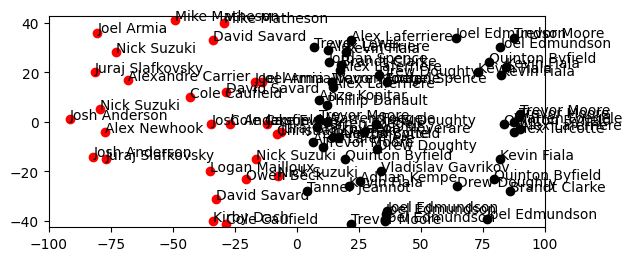

In [259]:
import numpy as np

np.random.seed(19680801)

home_shots = draw_shots(homeRoster, player_raw_stats, 50)
away_shots = draw_shots(awayRoster, player_raw_stats, -50)

plt.scatter(
    home_shots.get_column('x'), 
    home_shots.get_column('y'), c='black' )
plt.scatter(
    away_shots.get_column('x'), 
    away_shots.get_column('y'), c='red' )
plt.xlim(-100, 100)
plt.ylim(-42.5, 42.5)
plt.gca().set_aspect('equal')

home_names = home_shots.get_column('names')
for i in range(len(home_names)): 
    plt.annotate(home_names[i], (home_shots.get_column('x')[i] , home_shots.get_column('y')[i]))
away_names = away_shots.get_column('names')
for i in range(len(away_names)): 
    plt.annotate(away_names[i], (away_shots.get_column('x')[i] , away_shots.get_column('y')[i]))
plt.show()

In [ ]:
class Player:
    def __init__(self, bio, shifts, pplays):
        self.bio = bio
        self.shifts = [
            shift
            for shift in shifts
            if shift['playerId'] == bio['playerId']
        ]
        